<a href="https://colab.research.google.com/github/githubforkj/signate/blob/main/mufj/test01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 遊んでみるファイル

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/signate/mufj/Input/train.csv')
test = pd.read_csv('/content/drive/MyDrive/signate/mufj/Input/test.csv')
sample_sub = pd.read_csv('/content/drive/MyDrive/signate/mufj/Input/sample_submit.csv', names= ['id','label'])

In [ ]:
sample_sub

,id,label
0,test_00000,1
1,test_00001,0
2,test_00002,0
3,test_00003,0
4,test_00004,1
...,...,...
9795,test_09795,0
9796,test_09796,0
9797,test_09797,1
9798,test_09798,0


In [ ]:
print(train.isnull().value_counts())
print('---------------------------------------------------------')
print(test.isnull().value_counts())
# 欠損値がないことを確認

id     goal   country  duration  category1  category2  html_content  state
False  False  False    False     False      False      False         False    9791
dtype: int64
---------------------------------------------------------
id     goal   country  duration  category1  category2  html_content
False  False  False    False     False      False      False           9800
dtype: int64


In [ ]:
train.head()

,id,goal,country,duration,category1,category2,html_content,state
0,train_00000,20001-21000,US,45,art,mixed media,"<div class=""contents""><div><p><a href=""http://...",1
1,train_00001,19001-20000,US,59,food,restaurants,"<div class=""contents""><div><p>Cultural Pretzel...",0
2,train_00002,2001-3000,US,38,art,performance art,"<div class=""contents""><div><p>I want to perfor...",0
3,train_00003,1001-2000,US,30,art,mixed media,"<div class=""contents""><div><div class=""templat...",1
4,train_00004,1001-2000,US,29,film & video,webseries,"<div class=""contents""><div><p>The story of the...",1


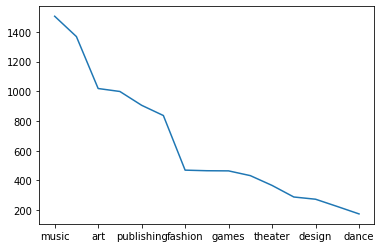

In [ ]:
train['category1'].value_counts().plot()
# 10個ほどの質的変数に変更できれば、one-hotエンコーディングできるのでは？

## 前処理

In [ ]:
# データ作成

import numpy as np
from sklearn.model_selection import train_test_split

# 学習データを7:3に分割
X_train, X_valid = train_test_split(
    train,test_size=0.3, random_state=42
)

# 説明変数と目的変数を分離

# 1:NLなし,2:NLあり
x_train1 = X_train.iloc[:,1:6]
x_train2 = X_train.iloc[:,6:7]
y_train = X_train.iloc[:,7:8]
x_valid1 = X_valid.iloc[:,1:6]
x_valid2 = X_valid.iloc[:,6:7]
y_valid = X_valid.iloc[:,7:8]
test1 = test.iloc[:,1:6]
test2 = test.iloc[:,6:7]


test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   html_content  9800 non-null   object
dtypes: object(1)
memory usage: 76.7+ KB


In [ ]:
type(x_train2['html_content'].values)

numpy.ndarray

### 'html_content'の処理

In [ ]:
# 文章をベクトル化(TFidfを使用)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 5000)
# scipyで疎行列を作成。文字列→ベクトル列に変換
x_train2 = vectorizer.fit_transform(x_train2['html_content'].values)
x_valid2 = vectorizer.transform(x_valid2['html_content'].values)
test2 = vectorizer.transform(test2['html_content'].values)

In [ ]:
# 出来上がった形を見る
print(x_train2.shape,x_valid2.shape,test2.shape)

(6853, 5000) (2938, 5000) (9800, 5000)


### 他通常の説明変数の処理

In [ ]:
print(x_train1.info())
print(x_valid1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6853 entries, 486 to 7270
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   goal       6853 non-null   object
 1   country    6853 non-null   object
 2   duration   6853 non-null   int64 
 3   category1  6853 non-null   object
 4   category2  6853 non-null   object
dtypes: int64(1), object(4)
memory usage: 321.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 6555 to 5428
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   goal       2938 non-null   object
 1   country    2938 non-null   object
 2   duration   2938 non-null   int64 
 3   category1  2938 non-null   object
 4   category2  2938 non-null   object
dtypes: int64(1), object(4)
memory usage: 137.7+ KB
None


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
le = OrdinalEncoder()


# 学習用、検証用データセット共に、ラベルエンコーディングを一括で行う
# 出来上がるのはpandas.DataFrameではなく、numpy.ndarrayであることに注意

le.fit(x_train1)
x_train1_n = le.transform(x_train1)

le.fit(x_valid1)
x_valid1_n = le.transform(x_valid1)

le.fit(test1)
test1_n = le.transform(test1)

In [ ]:
print(type(x_train1))
print(type(x_valid1))
print(type(test1))
print(type(x_train1_n))
print(type(x_valid1_n))
print(type(test1_n))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### モデルの作成

In [ ]:
import lightgbm as lgb

In [ ]:
# lightgbmで使用するためのDataset形式に変換する
train_set1 = lgb.Dataset(x_train1_n,y_train)
train_set2 = lgb.Dataset(x_train2,y_train)
valid_set1 = lgb.Dataset(x_valid1_n,y_valid)
valid_set2 = lgb.Dataset(x_valid2,y_valid)

In [ ]:
# パラメータの指定
params = {
    "objective":"binary", # 2値分類
    "metric":"binary_logloss", # 2値分類用の損失関数
}

In [ ]:
# NLなし
model1 = lgb.train(
    params = params,
    train_set = train_set1,
    valid_sets = [train_set1, valid_set1],
    num_boost_round = 300,
    early_stopping_rounds = 50,
    verbose_eval = 20,
)

Training until validation scores don't improve for 50 rounds.
[20]	training's binary_logloss: 0.535524	valid_1's binary_logloss: 0.593761
[40]	training's binary_logloss: 0.482063	valid_1's binary_logloss: 0.572425
[60]	training's binary_logloss: 0.454822	valid_1's binary_logloss: 0.568581
[80]	training's binary_logloss: 0.433974	valid_1's binary_logloss: 0.573274
[100]	training's binary_logloss: 0.416753	valid_1's binary_logloss: 0.574916
Early stopping, best iteration is:
[57]	training's binary_logloss: 0.458216	valid_1's binary_logloss: 0.567542


In [ ]:
# NLあり
model2 = lgb.train(
    params = params,
    train_set = train_set2,
    valid_sets = [train_set2, valid_set2],
    num_boost_round = 300,
    early_stopping_rounds = 50,
    verbose_eval = 20,
)

Training until validation scores don't improve for 50 rounds.
[20]	training's binary_logloss: 0.488107	valid_1's binary_logloss: 0.566662
[40]	training's binary_logloss: 0.393156	valid_1's binary_logloss: 0.540635
[60]	training's binary_logloss: 0.330489	valid_1's binary_logloss: 0.529983
[80]	training's binary_logloss: 0.283896	valid_1's binary_logloss: 0.528462
[100]	training's binary_logloss: 0.247521	valid_1's binary_logloss: 0.529328
[120]	training's binary_logloss: 0.217758	valid_1's binary_logloss: 0.531819
Early stopping, best iteration is:
[77]	training's binary_logloss: 0.289912	valid_1's binary_logloss: 0.527474


## 予測

In [ ]:
# 予測してみる(model1)
preds1 = model1.predict(x_valid1_n)

# 後々に2次元配列にしないとうまくいかない
preds1 = preds1.reshape(2938,1)

# 後でpreds2とブレンドするためにとっておく
preds1_c = preds1.copy()

# 0.5を閾値として、確率値を0と1に分ける
for (u,v) in enumerate(preds1):
    if v[0] >= 0.5:
        v[0] = 1
    else:
        v[0] = 0

# 正解率
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_valid.iloc[:,0], preds1)
print(acc)

0.7001361470388019


In [ ]:
# 予測してみる(model2)
preds2 = model2.predict(x_valid2)

# 後々に2次元配列にしないとうまくいかない
preds2 = preds2.reshape(2938,1)


# 後でpreds1とブレンドする
preds2_c = preds2.copy()

# 0.5を閾値として、確率値を0と1に分類する
for (u,v) in enumerate(preds2):
    if v[0] >= 0.5:
        v[0] = 1
    else:
        v[0] = 0

# 正解率
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_valid.iloc[:,0], preds2)
print(acc)

0.7426820966643976


In [ ]:
a = 0.6 * 0.7 + 0.2*0.3
a

0.48

In [ ]:
print(preds1_c)
print(preds2_c)

# ここでは同じ形のnumpy配列が欲しいため、copy()関数を使用している。
preds12 = preds1.copy()


# 上の結果より、ほー－－んの少し、NLありの方がスコアが高いため4:6で重みをつける(加重平均を取る)
for i,j in zip(preds1_c,preds2_c):
    score = i[0]*0.6 + j[0]*0.4
    if score >= 0.5:
        preds12[0] = 1
    else:
        preds12[0] = 0

preds12

# 正解率
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_valid.iloc[:,0], preds12)
print(acc)

[[0.62890881]
 [0.33268353]
 [0.56139518]
 ...
 [0.89943832]
 [0.7223424 ]
 [0.22667495]]
[[0.85567627]
 [0.4741771 ]
 [0.57997465]
 ...
 [0.70609841]
 [0.81134432]
 [0.11522887]]
0.6997957794417972


In [ ]:
# 予測してみる(test1)
t_preds1 = model1.predict(test1_n)

# 後々に2次元配列にしないとうまくいかない
t_preds1 = t_preds1.reshape(9800,1)

# 後でpreds2とブレンドするためにとっておく
t_preds1_c = t_preds1.copy()

# 0.5を閾値として、確率値を0と1に分ける
for (u,v) in enumerate(t_preds1):
    if v[0] >= 0.5:
        v[0] = 1
    else:
        v[0] = 0

t_preds1

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]])

In [ ]:
# 予測してみる(test2)
t_preds2 = model2.predict(test2)

# 後々に2次元配列にしないとうまくいかない
t_preds2 = t_preds2.reshape(9800,1)

# 後でpreds2とブレンドするためにとっておく
t_preds2_c = t_preds2.copy()

# 0.5を閾値として、確率値を0と1に分ける
for (u,v) in enumerate(t_preds2):
    if v[0] >= 0.5:
        v[0] = 1
    else:
        v[0] = 0

t_preds2

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [ ]:
print(t_preds1_c)
print(t_preds2_c)

# ここでは同じ形のnumpy配列が欲しいため、copy()関数を使用している。
t_preds12 = t_preds1.copy()


# 上の結果より、ほー－－んの少し、NLありの方がスコアが高いため3:7で重みをつける(加重平均を取る)
for i,j in zip(t_preds1_c,t_preds2_c):
    score = i[0]*0.7 + j[0]*0.3
    if score >= 0.5:
        t_preds12[0] = 1
    else:
        t_preds12[0] = 0

t_preds12

[[0.71837207]
 [0.78673191]
 [0.6783845 ]
 ...
 [0.35663319]
 [0.60079299]
 [0.33268353]]
[[0.20625839]
 [0.66456649]
 [0.8296508 ]
 ...
 [0.42933422]
 [0.13552324]
 [0.95871627]]


array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]])

In [ ]:
sample_sub
sample = sample_sub.iloc[:,0]
sample

0       test_00000
1       test_00001
2       test_00002
3       test_00003
4       test_00004
           ...    
9795    test_09795
9796    test_09796
9797    test_09797
9798    test_09798
9799    test_09799
Name: id, Length: 9800, dtype: object

In [ ]:
# 提出用にデータの整形
t_pred1 = pd.DataFrame(t_preds1, columns = ['label'])
t_pred2 = pd.DataFrame(t_preds2, columns = ['label'])
t_pred12 = pd.DataFrame(t_preds12, columns = ['label'])

n1 = pd.concat([sample,t_pred1],axis=1)
n2 = pd.concat([sample,t_pred2],axis=1)
n12 = pd.concat([sample,t_pred12],axis=1)

# t_pred1['no'] = range(0,len(t_pred1.index))
# t_pred1 = t_pred1[['no','label']]

# t_pred2['no'] = range(0,len(t_pred2.index))
# t_pred2 = t_pred2[['no','label']]

# t_pred12['no'] = range(0,len(t_pred12.index))
# t_pred12 = t_pred12[['no','label']]
n2

,id,label
0,test_00000,0.0
1,test_00001,1.0
2,test_00002,1.0
3,test_00003,0.0
4,test_00004,0.0
...,...,...
9795,test_09795,1.0
9796,test_09796,1.0
9797,test_09797,0.0
9798,test_09798,0.0


In [ ]:
# 結果をcsvに保存
n1[['id','label']].to_csv('./02_sub1.csv', header=False, index=False)
n2[['id','label']].to_csv('./02_sub2.csv', header=False, index=False)
n12[['id','label']].to_csv('./02_sub12.csv', header=False, index=False)